In [15]:
import json
import numpy as np
import re

jobs = json.load(open('latency-matrix-results/i3en3xlarge.json'))['jobs'][1:]
p50 = []
p95 = []
r_iops = []
w_bw = []

for j in jobs:
    name = j['jobname']
    read_clat = j['read']['clat_ns']
    if 'percentile' in read_clat:
        this_p50 = float(read_clat['percentile']['50.000000']) * 1e-6
        this_p95 = float(read_clat['percentile']['95.000000']) * 1e-6
    else:
        this_p50 = 0.
        this_p95 = 0.
    p50.append(this_p50)
    p95.append(this_p95)
    r_iops.append(float(j['read']['iops']))
    w_bw.append(float(j['write']['bw_bytes']))

<IPython.core.display.Javascript object>


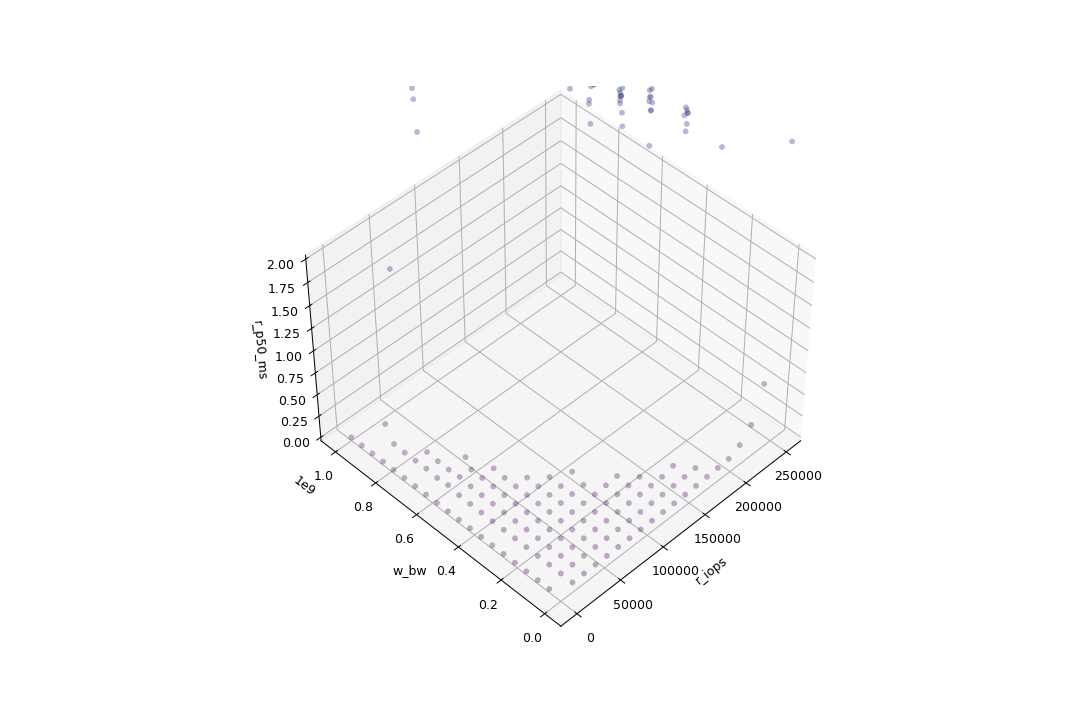

In [21]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

plt.rcParams['figure.figsize'] = [12, 8]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('r_iops')
ax.set_ylabel('w_bw')
ax.set_zlabel('r_p50_ms')
ax.set_zlim(0, 2)

ax.scatter(r_iops, w_bw, p50, c=p50, cmap='viridis', linewidth=0.1)
ax.view_init(45, -135)

<IPython.core.display.Javascript object>


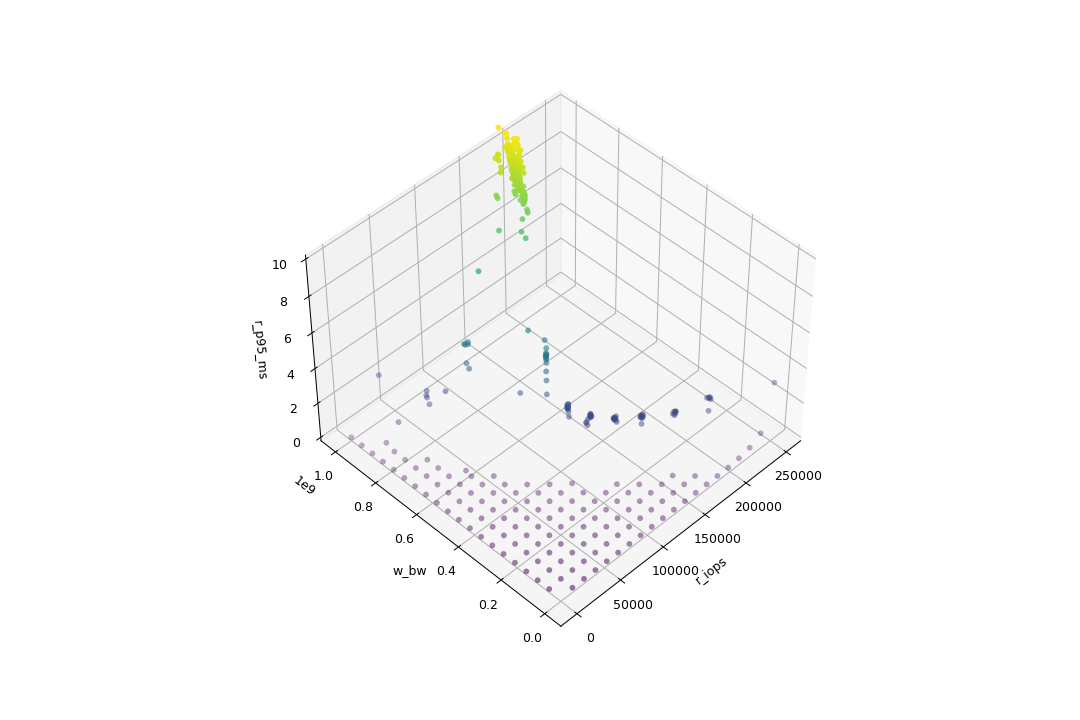

In [23]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

plt.rcParams['figure.figsize'] = [12, 8]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('r_iops')
ax.set_ylabel('w_bw')
ax.set_zlabel('r_p95_ms')
ax.set_zlim(0, 10)

ax.scatter(r_iops, w_bw, p50, c=p50, cmap='viridis', linewidth=0.1)
ax.view_init(45, -135)